# Business Problem - 
## Companies recommend coupons to their customers by using location-based services. To do this, companies need to understand the key factors that affect a customer's decision to accept those coupons to help them design better effective marketing strategies, that would improve customer engagement and drive better sales.

In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('C:/Users/SUVRANIL DAS/Desktop/in-vehicle-coupon-recommendation.csv')

In [6]:
df.head(2)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

# Finding Missing Values

In [10]:
df.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

# Data Cleaning and Pre-Processing

In [12]:
df['Bar'].fillna(df['Bar'].mode()[0], inplace=True)
df['CoffeeHouse'].fillna(df['CoffeeHouse'].mode()[0], inplace=True)
df['CarryAway'].fillna(df['CarryAway'].mode()[0], inplace=True)
df['RestaurantLessThan20'].fillna(df['RestaurantLessThan20'].mode()[0], inplace=True)
df['Restaurant20To50'].fillna(df['Restaurant20To50'].mode()[0], inplace=True)

C:\Users\SUVRANIL DAS\AppData\Local\Temp\ipykernel_16620\24937436.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bar'].fillna(df['Bar'].mode()[0], inplace=True)
C:\Users\SUVRANIL DAS\AppData\Local\Temp\ipykernel_16620\24937436.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [14]:
df1 = df.drop(['car'], axis = 1)

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

In [18]:
df1['income'].value_counts().sort_index(ascending=True)  # Sort by index (income ranges)

income
$100000 or More     1736
$12500 - $24999     1831
$25000 - $37499     2013
$37500 - $49999     1805
$50000 - $62499     1659
$62500 - $74999      846
$75000 - $87499      857
$87500 - $99999      895
Less than $12500    1042
Name: count, dtype: int64

# Encoding

In [20]:
df1['income_enc'] = df1['income'].map({'Less than $12500' :0, '$12500 - $24999' :1, '$12500 - $24999' :2, '$25000 - $37499' :3, '$37500 - $49999' :4, '$50000 - $62499' :5, '$62500 - $74999' :6, '$75000 - $87499' :7, '$87500 - $99999' :8, '$100000 or More' :9})

In [22]:
#no such data imbalance
df1['Y'].value_counts()

Y
1    7210
0    5474
Name: count, dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
#indepndent_var
df1['destination_enc']         = le.fit_transform(df['destination'])
df1['passanger_enc']           = le.fit_transform(df['passanger'])
df1['weather_enc']             = le.fit_transform(df['weather'])
df1['time_enc']                = le.fit_transform(df['time'])
df1['coupon_enc']              = le.fit_transform(df['coupon'])
df1['expiration_enc']          = le.fit_transform(df['expiration'])
df1['gender_enc']              = le.fit_transform(df['gender'])
df1['age_enc']                 = le.fit_transform(df['age'])
df1['maritalStatus_enc']       = le.fit_transform(df['maritalStatus'])
df1['education_enc']           = le.fit_transform(df['education'])
df1['occupation_enc']          = le.fit_transform(df['occupation'])
df1['Bar_enc']                 = le.fit_transform(df['Bar'])
df1['CoffeeHouse_enc']         = le.fit_transform(df['CoffeeHouse'])
df1['CarryAway_enc']           = le.fit_transform(df['CarryAway'])
df1['RestaurantLessThan20_enc']= le.fit_transform(df['RestaurantLessThan20'])
df1['Restaurant20To50_enc']    = le.fit_transform(df['Restaurant20To50'])

# Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

df1['temperature_standardization'] = ss.fit_transform(df1[['temperature']])

In [30]:
df1.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,age_enc,maritalStatus_enc,education_enc,occupation_enc,Bar_enc,CoffeeHouse_enc,CarryAway_enc,RestaurantLessThan20_enc,Restaurant20To50_enc,temperature_standardization
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,0,3,5,24,4,4,0,1,0,-0.433430
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,0,3,5,24,4,4,0,1,0,0.871799
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,0,3,5,24,4,4,0,1,0,0.871799
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,0,3,5,24,4,4,0,1,0,0.871799
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,0,3,5,24,4,4,0,1,0,0.871799


In [32]:
df1.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ5min',
       'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same',
       'direction_opp', 'Y', 'income_enc', 'destination_enc', 'passanger_enc',
       'weather_enc', 'time_enc', 'coupon_enc', 'expiration_enc', 'gender_enc',
       'age_enc', 'maritalStatus_enc', 'education_enc', 'occupation_enc',
       'Bar_enc', 'CoffeeHouse_enc', 'CarryAway_enc',
       'RestaurantLessThan20_enc', 'Restaurant20To50_enc',
       'temperature_standardization'],
      dtype='object')

# Training and Testing

In [34]:
from sklearn.model_selection import train_test_split

Y = df1['Y']
X = df1[['income_enc', 'destination_enc', 'passanger_enc', 'weather_enc', 'temperature', 'time_enc', 'coupon_enc', 'expiration_enc', 'gender_enc', 'age_enc', 'maritalStatus_enc', 'education_enc', 'occupation_enc', 'Bar_enc', 'CoffeeHouse_enc', 'CarryAway_enc', 'RestaurantLessThan20_enc', 'Restaurant20To50_enc']]

In [36]:
#Dividing the Dataset into training and testing

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

# Random Forest

In [38]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [42]:
#Create a Gaussian Classifier
rf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [44]:
Y_pred1 = rf.predict(X_test)

# Calculating Performance for Random Forest

In [46]:
print ("accuracy:", accuracy_score(Y_pred1,Y_test), "precision_score: ", precision_score(Y_pred1,Y_test),"recall_score: ", recall_score(Y_pred1,Y_test),"f1_score: ",f1_score(Y_pred1,Y_test))

accuracy: 0.7527588018917498 precision_score:  0.827906976744186 recall_score:  0.7571246278179498 f1_score:  0.790935347700511


# Visualizing Important Features

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


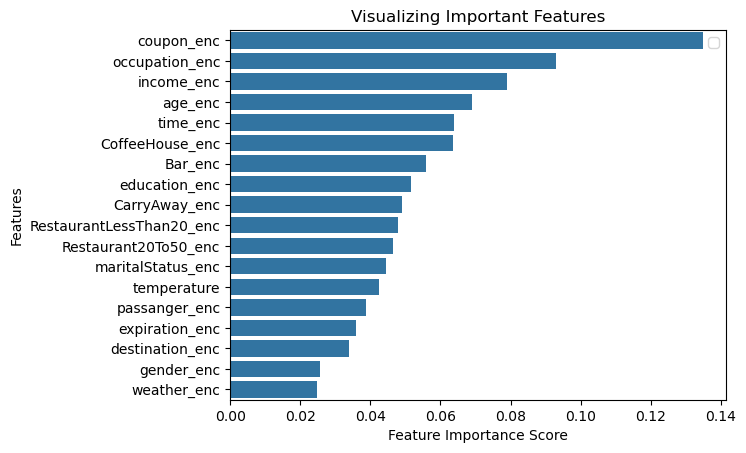

In [48]:
# Visualizing Important Features

feature_imp1 = pd.Series(rf.feature_importances_,index=X_train.columns).sort_values(ascending=False)

#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp1, y=feature_imp1.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier

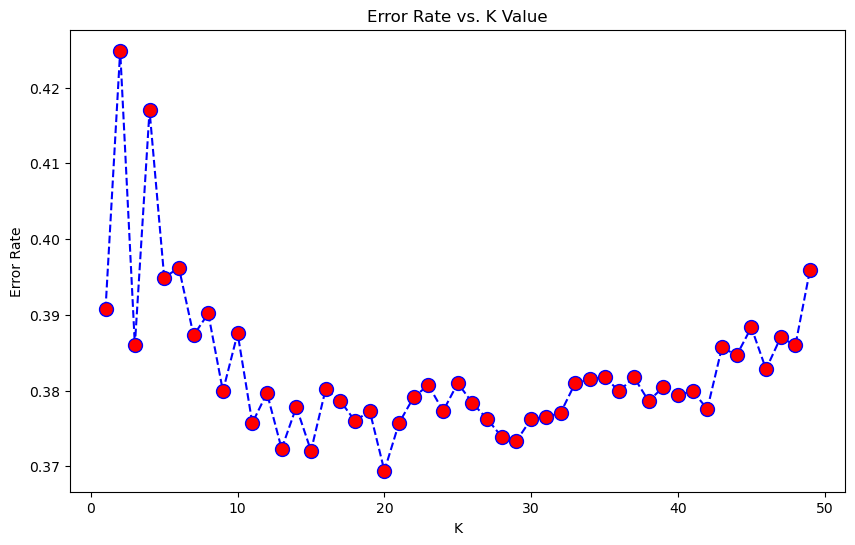

Minimum error:- 0.36941671045717284 at K = 20


In [52]:
error_rate = []
for i in range(1,50):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,Y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(Y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [53]:
knn = KNeighborsClassifier(n_neighbors=41, metric='euclidean')
knn.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=41)

In [54]:
Y_pred2 = knn.predict(X_test)

# Calculating Performance for KNN

In [57]:
print ("accuracy:", accuracy_score(Y_pred2,Y_test), "precision_score: ", precision_score(Y_pred2,Y_test),"recall_score: ", recall_score(Y_pred2,Y_test),"f1_score: ",f1_score(Y_pred2,Y_test))

accuracy: 0.6200735680504467 precision_score:  0.7758139534883721 recall_score:  0.6337386018237082 f1_score:  0.6976160602258469


# XGBoost

In [58]:
#Import XGBoost
import xgboost as xgb

clf3 = xgb.XGBClassifier()

clf3.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [66]:
Y_pred3=clf3.predict(X_test)

# Calculating Performance for XGBoost

In [68]:
print ("accuracy:", accuracy_score(Y_pred3,Y_test), "precision_score: ", precision_score(Y_pred3,Y_test),"recall_score: ", recall_score(Y_pred3,Y_test),"f1_score: ",f1_score(Y_pred3,Y_test))

accuracy: 0.7527588018917498 precision_score:  0.8065116279069767 recall_score:  0.7675962815405046 f1_score:  0.7865729190292583


# Visualizing Important Features

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


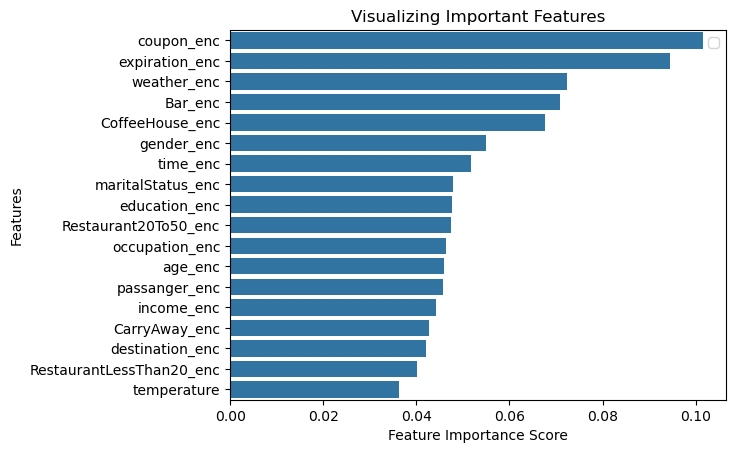

In [70]:
feature_imp3 = pd.Series(clf3.feature_importances_,index=X_train.columns).sort_values(ascending=False)

#visualizing feature importance results
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp3, y=feature_imp3.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Comparing the performance of the Algorithms

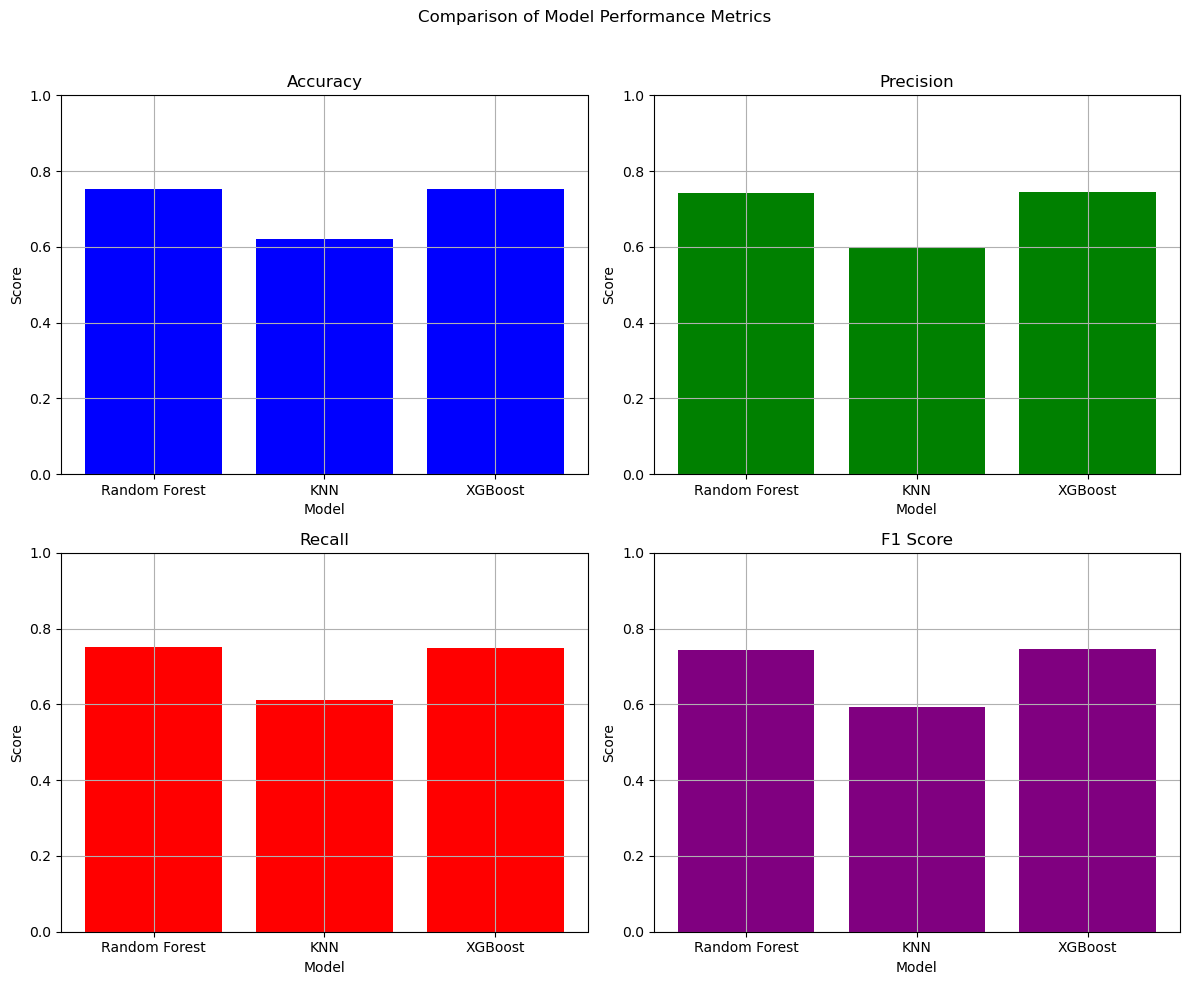

In [72]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the scores for each prediction
scores1 = {
    'accuracy': accuracy_score(Y_pred1, Y_test),
    'precision': precision_score(Y_pred1, Y_test, average='macro'),  # Specify average='macro' for multiclass
    'recall': recall_score(Y_pred1, Y_test, average='macro'),
    'f1': f1_score(Y_pred1, Y_test, average='macro')
}

scores2 = {
    'accuracy': accuracy_score(Y_pred2, Y_test),
    'precision': precision_score(Y_pred2, Y_test, average='macro'),
    'recall': recall_score(Y_pred2, Y_test, average='macro'),
    'f1': f1_score(Y_pred2, Y_test, average='macro')
}

scores3 = {
    'accuracy': accuracy_score(Y_pred3, Y_test),
    'precision': precision_score(Y_pred3, Y_test, average='macro'),
    'recall': recall_score(Y_pred3, Y_test, average='macro'),
    'f1': f1_score(Y_pred3, Y_test, average='macro')
}

# Create a DataFrame to organize the scores for plotting
import pandas as pd
scores_df = pd.DataFrame([scores1, scores2, scores3], index=['Random Forest', 'KNN', 'XGBoost'])

# Plotting the bar graphs
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Comparison of Model Performance Metrics')

# Plot Accuracy
axes[0, 0].bar(scores_df.index, scores_df['accuracy'], color='blue')
axes[0, 0].set_title('Accuracy')
axes[0, 0].set_ylim(0, 1)

# Plot Precision
axes[0, 1].bar(scores_df.index, scores_df['precision'], color='green')
axes[0, 1].set_title('Precision')
axes[0, 1].set_ylim(0, 1)

# Plot Recall
axes[1, 0].bar(scores_df.index, scores_df['recall'], color='red')
axes[1, 0].set_title('Recall')
axes[1, 0].set_ylim(0, 1)

# Plot F1 Score
axes[1, 1].bar(scores_df.index, scores_df['f1'], color='purple')
axes[1, 1].set_title('F1 Score')
axes[1, 1].set_ylim(0, 1)

# Adding labels and grid
for ax in axes.flat:
    ax.set_ylabel('Score')
    ax.set_xlabel('Model')
    ax.grid(True)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plots
plt.show()


In [74]:
new_test_data = pd.read_excel('C:/Users/SUVRANIL DAS/Downloads/New_test_data.xlsx')

In [76]:
new_test_data.head(1)

,income_enc,destination_enc,passanger_enc,weather_enc,temperature,time_enc,coupon_enc,expiration_enc,gender_enc,age_enc,maritalStatus_enc,education_enc,occupation_enc,Bar_enc,CoffeeHouse_enc,CarryAway_enc,RestaurantLessThan20_enc,Restaurant20To50_enc
0,5,2,3,2,-0.43343,1,2,2,1,2,1,2,1,1,1,0,0,0


In [78]:
clf3.predict(new_test_data)

array([0])